# Webscraping script with data visualization and analysis

This python script used pandas to scrape a table on a web page and save it as a dataframe. It then cleans the data and displays a plot of revenue and expense trends over time, performs an Ordinary Least Squares regression analysis to predict Revenue based on Expenses, and calculates the year-over-year growth rate of Revenue and Expenses.

In [2]:
import pandas as pd

In [3]:
# use read_html(url) from pandas to get webpage contents
url = "https://en.wikipedia.org/wiki/Wikipedia:Fundraising_statistics"
tables = pd.read_html(url)

In [4]:
type(tables)

list

In [5]:
len(tables)

1

In [6]:
tables[0].head()

,Year,Source,Revenue,Expenses,Asset rise,Net assets at end of year
0,2022/2023,PDF,"$180,174,103","$169,095,381","$15,619,804","$254,971,336"
1,2021/2022,PDF,"$154,686,521","$145,970,915","$8,173,996","$239,351,532"
2,2020/2021,PDF,"$162,886,686","$111,839,819","$50,861,811","$231,177,536"
3,2019/2020,PDF,"$129,234,327","$112,489,397","$14,674,300","$180,315,725"
4,2018/2019,PDF,"$120,067,266","$91,414,010","$30,691,855","$165,641,425"


# create a copy and leave the original data unchanged.

In [7]:
df = tables[0]

In [8]:
fundraising = df.copy()

In [9]:
# select the table I want to use as a DataFrame
fundraising = tables[0]

In [10]:
fundraising.head()

,Year,Source,Revenue,Expenses,Asset rise,Net assets at end of year
0,2022/2023,PDF,"$180,174,103","$169,095,381","$15,619,804","$254,971,336"
1,2021/2022,PDF,"$154,686,521","$145,970,915","$8,173,996","$239,351,532"
2,2020/2021,PDF,"$162,886,686","$111,839,819","$50,861,811","$231,177,536"
3,2019/2020,PDF,"$129,234,327","$112,489,397","$14,674,300","$180,315,725"
4,2018/2019,PDF,"$120,067,266","$91,414,010","$30,691,855","$165,641,425"


In [11]:
fundraising

,Year,Source,Revenue,Expenses,Asset rise,Net assets at end of year
0,2022/2023,PDF,"$180,174,103","$169,095,381","$15,619,804","$254,971,336"
1,2021/2022,PDF,"$154,686,521","$145,970,915","$8,173,996","$239,351,532"
2,2020/2021,PDF,"$162,886,686","$111,839,819","$50,861,811","$231,177,536"
3,2019/2020,PDF,"$129,234,327","$112,489,397","$14,674,300","$180,315,725"
4,2018/2019,PDF,"$120,067,266","$91,414,010","$30,691,855","$165,641,425"
5,2017/2018,PDF,"$104,505,783","$81,442,265","$21,619,373","$134,949,570"
6,2016/2017,PDF,"$91,242,418","$69,136,758","$21,547,402","$113,330,197"
7,2015/2016,PDF,"$81,862,724","$65,947,465","$13,962,497","$91,782,795"
8,2014/2015,PDF,"$75,797,223","$52,596,782","$24,345,277","$77,820,298"
9,2013/2014,PDF,"$52,465,287","$45,900,745","$8,285,897","$53,475,021"


In [12]:
type(fundraising)

pandas.core.frame.DataFrame

In [13]:
# clean up the data by removing unnecessary characters and casting types to int for data analysis

In [14]:
fundraising['Yr'] = fundraising['Year'].str[:4]
fundraising['Yr'] = fundraising['Yr'].str.replace('/','')
fundraising['Yr'] = pd.to_numeric(fundraising['Yr'])

In [15]:
fundraising['Rev'] = fundraising['Revenue'].str[2:]
fundraising['Rev'] = fundraising['Rev'].str.replace(',','')
fundraising['Rev'] = pd.to_numeric(fundraising['Rev'])

In [16]:
fundraising['Exp'] = fundraising['Expenses'].str[2:]
fundraising['Exp'] = fundraising['Exp'].str.replace(',','')
fundraising['Exp'] = pd.to_numeric(fundraising['Exp'])

In [17]:
fundraising['Rise'] = fundraising['Asset rise'].str[2:]
fundraising['Rise'] = fundraising['Rise'].str.replace(',','')
fundraising['Rise'] = pd.to_numeric(fundraising['Rise'])

fundraising['Net'] = fundraising['Net assets at end of year'].str[2:]
fundraising['Net'] = fundraising['Net'].str.replace(',','')
fundraising['Net'] = pd.to_numeric(fundraising['Net'])

In [18]:
fundraising.head()

,Year,Source,Revenue,Expenses,Asset rise,Net assets at end of year,Yr,Rev,Exp,Rise,Net
0,2022/2023,PDF,"$180,174,103","$169,095,381","$15,619,804","$254,971,336",2022,80174103,69095381,5619804,54971336
1,2021/2022,PDF,"$154,686,521","$145,970,915","$8,173,996","$239,351,532",2021,54686521,45970915,173996,39351532
2,2020/2021,PDF,"$162,886,686","$111,839,819","$50,861,811","$231,177,536",2020,62886686,11839819,861811,31177536
3,2019/2020,PDF,"$129,234,327","$112,489,397","$14,674,300","$180,315,725",2019,29234327,12489397,4674300,80315725
4,2018/2019,PDF,"$120,067,266","$91,414,010","$30,691,855","$165,641,425",2018,20067266,1414010,691855,65641425


In [19]:
# Create a new DataFrame with only the necessary columns
new_df = fundraising.drop(columns=['Year','Source', 'Revenue', 'Expenses', 'Asset rise', 'Net assets at end of year'])

# Check the new DataFrame
new_df.head()

,Yr,Rev,Exp,Rise,Net
0,2022,80174103,69095381,5619804,54971336
1,2021,54686521,45970915,173996,39351532
2,2020,62886686,11839819,861811,31177536
3,2019,29234327,12489397,4674300,80315725
4,2018,20067266,1414010,691855,65641425


In [20]:
new_df

,Yr,Rev,Exp,Rise,Net
0,2022,80174103,69095381,5619804,54971336
1,2021,54686521,45970915,173996,39351532
2,2020,62886686,11839819,861811,31177536
3,2019,29234327,12489397,4674300,80315725
4,2018,20067266,1414010,691855,65641425
5,2017,4505783,1442265,1619373,34949570
6,2016,1242418,9136758,1547402,13330197
7,2015,1862724,5947465,3962497,1782795
8,2014,5797223,2596782,4345277,7820298
9,2013,2465287,5900745,285897,3475021


In [78]:
new_df.shape

(20, 5)

In [79]:
new_df.dtypes

Yr      int64
Rev     int64
Exp     int64
Rise    int64
Net     int64
dtype: object

In [80]:
new_df1 = new_df.sort_values(by = 'Rev')
new_df1.head(5)

,Yr,Rev,Exp,Rise,Net
19,2003,129,3463,6666,6666
15,2007,32981,540724,519886,178168
18,2004,79088,77670,11418,68084
17,2005,508039,91907,36132,4216
14,2008,658006,617236,53599,231767


# Data visualization

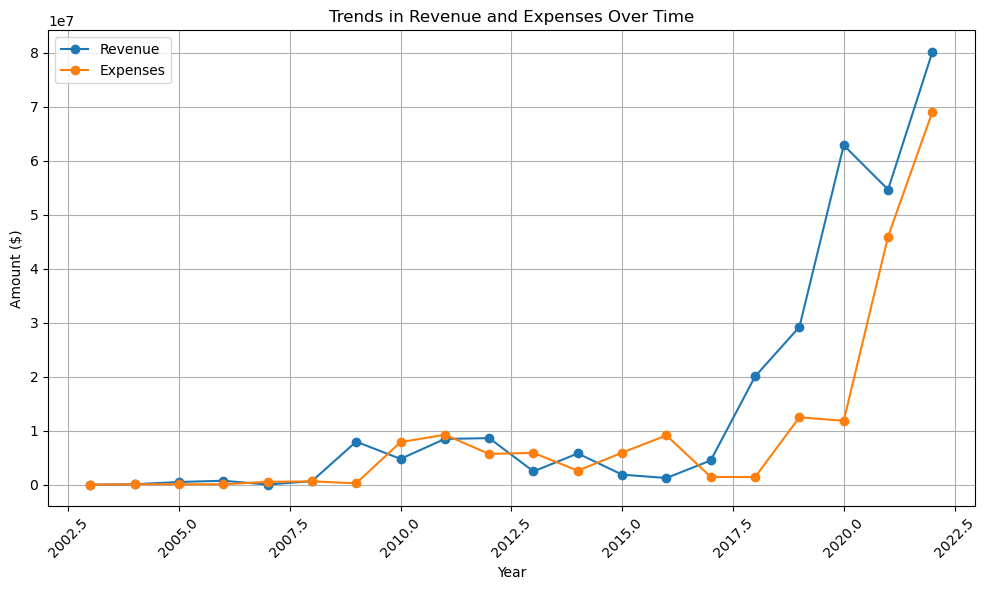

In [81]:
import matplotlib.pyplot as plt

# Sort DataFrame by 'Yr'
new_df = new_df.sort_values(by='Yr')

# Plot trends over time
plt.figure(figsize=(10, 6))
plt.plot(new_df['Yr'], new_df['Rev'], label='Revenue', marker='o')
plt.plot(new_df['Yr'], new_df['Exp'], label='Expenses', marker='o')
plt.title('Trends in Revenue and Expenses Over Time')
plt.xlabel('Year')
plt.ylabel('Amount ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Ordinary Least Squares (OLS) regression analysis

perform an Ordinary Least Squares (OLS) regression analysis on the data, specifically predicting 'Rev' (Revenue) based on 'Exp' (Expenses).

In [82]:
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [83]:
# Predict revenue using as predictor the expenses
y = new_df['Rev']
X = new_df['Exp']
X = pd.DataFrame(X)
X[:5]

,Exp
19,3463
18,77670
17,91907
16,77843
15,540724


In [84]:
X1 = X.copy()
X1.insert(0,'const',1)
X1[:5]

,const,Exp
19,1,3463
18,1,77670
17,1,91907
16,1,77843
15,1,540724


In [85]:
model1 = sm.OLS(y,X1).fit()
model1.params

const    3.732938e+06
Exp      1.156499e+00
dtype: float64

In [86]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Rev   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     46.87
Date:                Sat, 27 Apr 2024   Prob (F-statistic):           2.09e-06
Time:                        13:45:14   Log-Likelihood:                -354.58
No. Observations:                  20   AIC:                             713.2
Df Residuals:                      18   BIC:                             715.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.733e+06   3.28e+06      1.139      0.270   -3.15e+06    1.06e+07
Exp            1.1565      0.169      6.846      0.000       0.802       1.511
==============================================================================
Omnibus:                       31.957   Durbin-Watson:                   1.451
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.912
Skew:                           2.642   Prob(JB):                     4.87e-15
Kurtosis:                      10.154   Cond. No.                     2.23e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
# Ordinary Least Squares (OLS) regression analysis on the data, specifically predicting 'Rev' (Revenue) based on 'Exp' (Expenses).
# An R-squared of 0.723 indicates that approximately 72.3% of the variance in Revenue can be explained by Expenses in this model.
# In this model, the coefficient for 'Exp' is 1.1565, meaning that for every one unit increase in Expenses, Revenue is predicted to increase by approximately 1.1565 units.
#  In this model, the p-value for 'Exp' is very low (close to 0), indicating that Expenses is a significant predictor of Revenue.
# For every additional dollar spent on Expenses, the model predicts that Revenue will increase by approximately $1.1565.

# feature engineering:

Calculating Growth Rates:
calculate growth rates for different numerical variables over time. calculate the year-over-year growth rate of Revenue and Expenses.

value is NaN (Not a Number) for the first row because there is no previous value to compute the percentage change.

In [88]:
# Calculate year-over-year growth rates for Revenue and Expenses
new_df['Rev_growth_rate'] = new_df['Rev'].pct_change()
new_df['Exp_growth_rate'] = new_df['Exp'].pct_change()

In [89]:
new_df

,Yr,Rev,Exp,Rise,Net,Rev_growth_rate,Exp_growth_rate
19,2003,129,3463,6666,6666,NaN,NaN
18,2004,79088,77670,11418,68084,612.085271,21.428530
17,2005,508039,91907,36132,4216,5.423718,0.183301
16,2006,734909,77843,54066,658282,0.446560,-0.153024
15,2007,32981,540724,519886,178168,-0.955122,5.946341
14,2008,658006,617236,53599,231767,18.951063,0.141499
13,2009,7979312,266793,310964,4542731,11.126503,-0.567762
12,2010,4785092,7889794,649413,4192144,-0.400313,28.572717
11,2011,8479665,9260652,736914,4929058,0.772101,0.173751
10,2012,8635408,5704796,260066,5189124,0.018367,-0.383975
